# NLP(Natural language processing) 
Сегодня мы будем заниматься созданием бота, который распознает тип сообщения по его эмоциональной окраске(Негативный, Позитивный, Нейтральный)

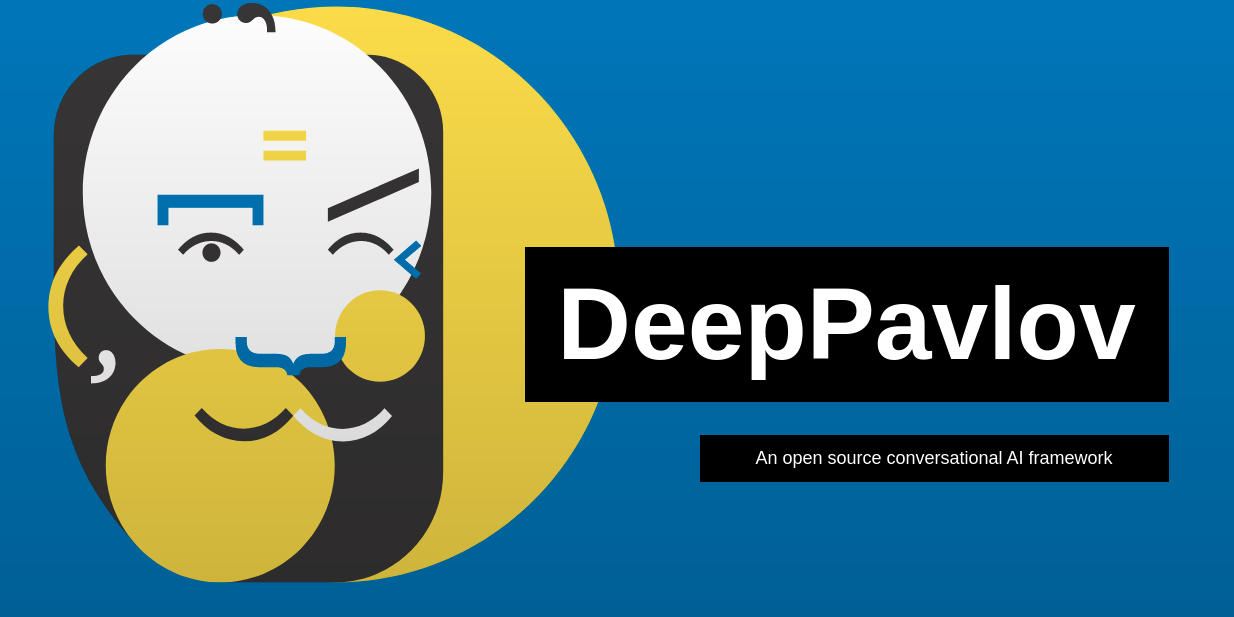

Deeppavlov представляет собой библиотеку из разных моделей для машинного обучения и датасетов. Многие из них уже претренированы. Библиотека была разарботана и поддерживается командой из МФТИ(Московский Физико Технический университет). На сайте в левом верхнем углу есть вкладка DEMO. На которой можно посмотреть, какие существуют задачи в Машинном обучении, когда дело доходит до естественных языков.
https://deeppavlov.ai/

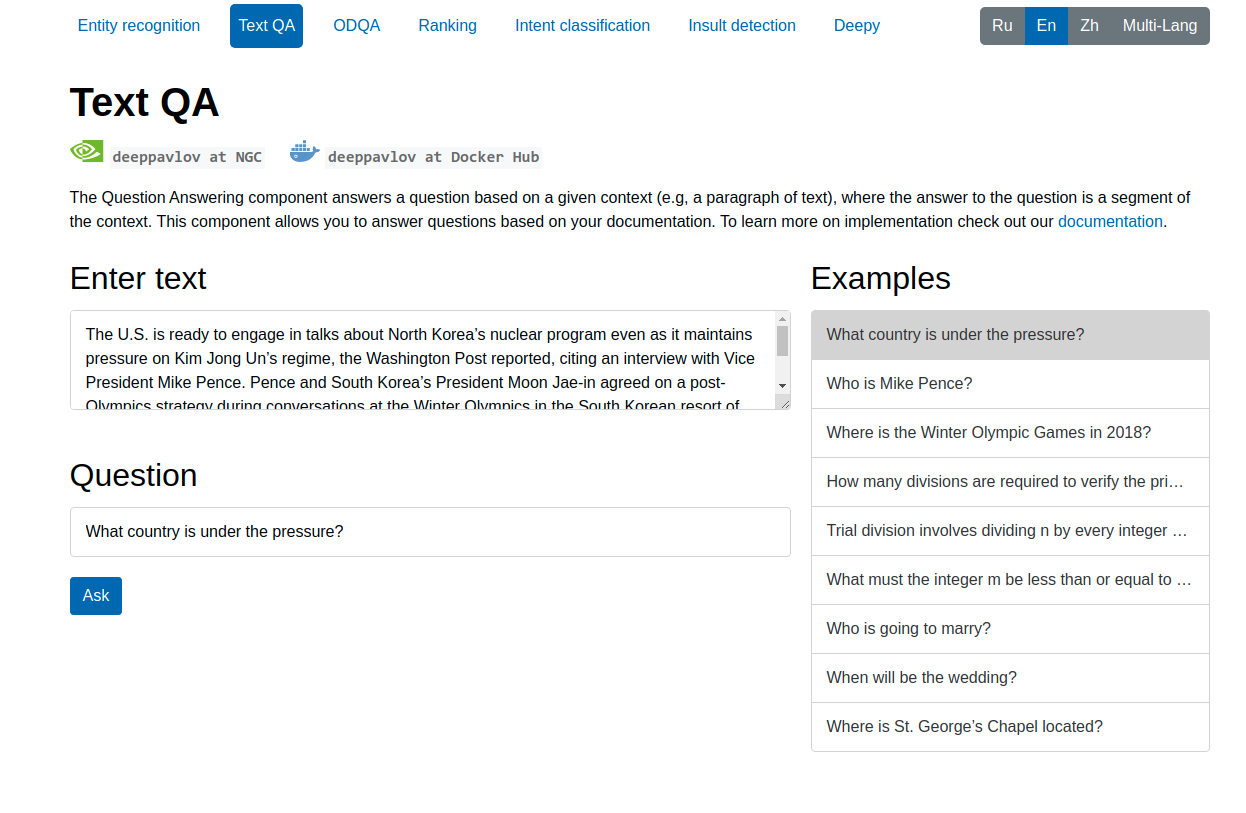

### Давайте выберем русский язык и посмотрим, что deepPavlov умеет делать

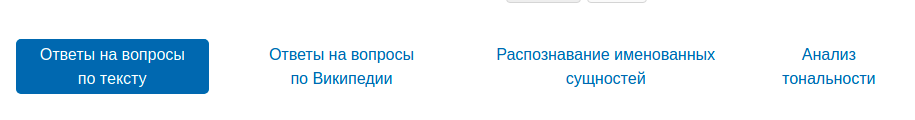

На русском он может отвечать на вопросы по тексту, отвечать на вопросы из википедии, распозновать именованные сущности и делать анализ тональности. Именно анализ тональности мы и будем использовать, для того, чтобы сделать нашего бота

# Свой собственный API
http://204.48.22.151:5555/docs#/default/answer_model_post

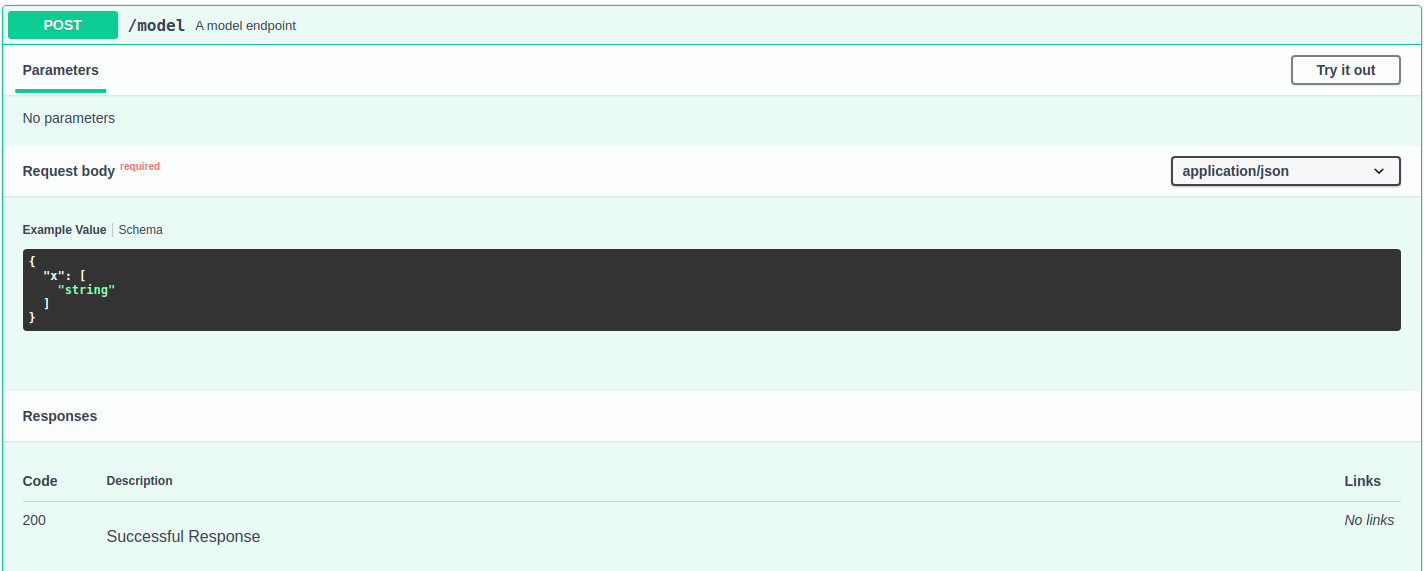

Импортируем discord и requests
<br>
Задаем основные параметры
API_URL, TOKEN и client

In [ ]:
import discord
import requests


API_URL = 'http://204.48.22.151:5555/model'
TOKEN = 'ВАШ ТОКЕН'
client = discord.Client()

Пишем простой "hello world" в дискорде и проверям, чтобы все работало

In [ ]:
import discord
import requests


API_URL = 'http://204.48.22.151:5555/model'
TOKEN = 'ВАШ ТОКЕН'
client = discord.Client()

# @client.event - это декоратор. 
# Декораторами в питоне незывают функции, 
# который принимают функцию как аргумент и возвращают функцию
@client.event
async def on_ready():
    for guild in client.guilds:
        print('Hello '+str(guild))

client.run(TOKEN)

Добавляем функцию по работе с сообщениями

In [ ]:
import discord
import requests


API_URL = 'http://204.48.22.151:5555/model'
TOKEN = 'ВАШ ТОКЕН'
client = discord.Client()

# @client.event - это декоратор. 
# Декораторами в питоне незывают функции, 
# который принимают функцию как аргумент и возвращают функцию
@client.event
async def on_ready():
    for guild in client.guilds:
        print('Hello '+str(guild))

@client.event
async def on_message(message):
    # В случае, если автором сообщения является бот
    # то мы не отвечаем. Иначе бот будет разговаривать сам с собой
    if message.author == client.user:
        return
    await message.channel.send('Привет')

client.run(TOKEN)

Добавляем фукнцию по работе с API, чтобы получить тональность

In [ ]:
import discord
import requests


API_URL = 'http://204.48.22.151:5555/model'
TOKEN = 'ВАШ ТОКЕН'
client = discord.Client()

def request_sentiment(message):
    data = {'x': [message]}
    res = requests.post(API_URL, json=data).json()
    santiment = res[0][0]
    return santiment

# @client.event - это декоратор. 
# Декораторами в питоне незывают функции, 
# который принимают функцию как аргумент и возвращают функцию
@client.event
async def on_ready():
    for guild in client.guilds:
        print('Hello '+str(guild))

@client.event
async def on_message(message):
    # В случае, если автором сообщения является бот
    # то мы не отвечаем. Иначе бот будет разговаривать сам с собой
    if message.author == client.user:
        return
    await message.channel.send('Привет')

client.run(TOKEN)

Прописываем простое поведение бота в зависимости от тональности сообщения

In [ ]:
import discord
import requests


API_URL = 'http://204.48.22.151:5555/model'
TOKEN = 'ВАШ ТОКЕН'
client = discord.Client()

def request_sentiment(message):
    data = {'x': [message]}
    res = requests.post(API_URL, json=data).json()
    santiment = res[0][0]
    return santiment

# @client.event - это декоратор. 
# Декораторами в питоне незывают функции, 
# который принимают функцию как аргумент и возвращают функцию
@client.event
async def on_ready():
    for guild in client.guilds:
        print('Hello '+str(guild))


@client.event
async def on_message(message):
    # В случае, если автором сообщения является бот
    # то мы не отвечаем. Иначе бот будет разговаривать сам с собой
    if message.author == client.user:
        return

    setiment = request_sentiment(message.content)
    if setiment == 'positive':
        await message.channel.send('Спасибо за добрые слова')     
    if setiment == 'negative':
        await message.channel.send('Хватит ругаться')     
    if setiment == 'neutral':
        await message.channel.send('Хорошо') 

# Команда должна быть всегда в самом низу нашего скрипта
client.run(TOKEN)

# Практическое задание. Пидумать бота разговорника, который будет использовать тональность для реакции на разные события(15 мин.)

# Объединяем бота с 4 занятием с нашим ботом

Добавляем функцию по работе с API классификацией котов и собак

In [ ]:
import discord
import requests


API_URL = 'http://204.48.22.151:5555/model'
TOKEN = 'ВАШ ТОКЕН'
IMG_EXTENTIONS = ['jpg', 'png', 'jpeg']

client = discord.Client()

def request_api_data(url, filename):
    data = {"url": url, "filename": filename}
    url = "http://104.236.235.5:5000/predict"
    response = requests.post(url, data)
    if response.status_code == 200:
        label = response.json()['class_name']
        return label
    return 'Произошла ошибка при запросе данных'


def request_sentiment(message):
    data = {'x': [message]}
    res = requests.post(API_URL, json=data).json()
    santiment = res[0][0]
    return santiment

# @client.event - это декоратор. 
# Декораторами в питоне незывают функции, 
# который принимают функцию как аргумент и возвращают функцию
@client.event
async def on_ready():
    for guild in client.guilds:
        print('Hello '+str(guild))


@client.event
async def on_message(message):
    # В случае, если автором сообщения является бот
    # то мы не отвечаем. Иначе бот будет разговаривать сам с собой
    if message.author == client.user:
        return

    setiment = request_sentiment(message.content)
    if setiment == 'positive':
        await message.channel.send('Спасибо за добрые слова')     
    if setiment == 'negative':
        await message.channel.send('Хватит ругаться')     
    if setiment == 'neutral':
        await message.channel.send('Хорошо') 

# Команда должна быть всегда в самом низу нашего скрипта
client.run(TOKEN)

Добавляем логику реагирования на отправленное фото

In [ ]:
import discord
import requests


API_URL = 'http://204.48.22.151:5555/model'
TOKEN = 'ВАШ ТОКЕН'
IMG_EXTENTIONS = ['jpg', 'png', 'jpeg']

client = discord.Client()

def request_api_data(url, filename):
    data = {"url": url, "filename": filename}
    url = "http://104.236.235.5:5000/predict"
    response = requests.post(url, data)
    if response.status_code == 200:
        label = response.json()['class_name']
        return label
    return 'Произошла ошибка при запросе данных'


def request_sentiment(message):
    data = {'x': [message]}
    res = requests.post(API_URL, json=data).json()
    santiment = res[0][0]
    return santiment

# @client.event - это декоратор. 
# Декораторами в питоне незывают функции, 
# который принимают функцию как аргумент и возвращают функцию
@client.event
async def on_ready():
    for guild in client.guilds:
        print('Hello '+str(guild))


@client.event
async def on_message(message):
    # В случае, если автором сообщения является бот
    # то мы не отвечаем. Иначе бот будет разговаривать сам с собой
    if message.author == client.user:
        return

    if len(message.attachments) == 1:
        attachment = message.attachments[0]
        ext = attachment.filename.split('.')[-1]
        if ext in IMG_EXTENTIONS:
            data = request_api_data(attachment.url, attachment.filename)
            await message.channel.send(data)

    setiment = request_sentiment(message.content)
    if setiment == 'positive':
        await message.channel.send('Спасибо за добрые слова')     
    if setiment == 'negative':
        await message.channel.send('Хватит ругаться')     
    if setiment == 'neutral':
        await message.channel.send('Хорошо') 

# Команда должна быть всегда в самом низу нашего скрипта
client.run(TOKEN)